In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Inspector = inspect(engine)
Inspector.get_table_names()

['measurement', 'station']

In [7]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.

# columns = Inspector.get_columns('measurement')
# for c in columns:
#     print(c['name'], c["type"])
    
columns = Inspector.get_columns('Measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
# Just checking out the table data
# engine.execute('SELECT * FROM Measurement LIMIT 10').fetchall()

# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
date_results = session.query(Measurement.date).order_by(Measurement.date.desc()).all()
most_recent = date_results[0][0]
most_recent_dt = dt.datetime.strptime(most_recent, '%Y-%m-%d')

# Calculate the date one year from the last date in data set.

one_year_prior = most_recent_dt - dt.timedelta(days=365)
# one_year_prior

# Perform a query to retrieve the data and precipitation scores
prcp_results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_prior).\
    order_by(Measurement.date).all()
# prcp_results

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(prcp_results)
prcp_df['date'] = pd.to_datetime(prcp_df['date'])
prcp_df = prcp_df.set_index('date')
prcp_df.head(20)

# Sort the dataframe by date
# already done

# Fill NaN's
prcp_df = prcp_df.fillna(0)
prcp_df = prcp_df.groupby(by=prcp_df.index).max()
prcp_df.head()

,prcp
date,
2016-08-24,2.28
2016-08-25,0.21
2016-08-26,0.04
2016-08-27,0.18
2016-08-28,2.07


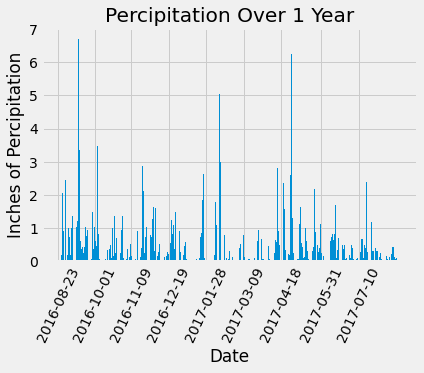

In [11]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.bar(prcp_df.index, prcp_df['prcp'])
labels = ['2016-08-23','2016-10-01','2016-11-09','2016-12-19','2017-01-28','2017-03-09','2017-04-18','2017-05-31','2017-07-10']
dates = [dt.datetime.strptime(x,'%Y-%m-%d') for x in labels]
plt.xticks(ticks=dates,labels=labels, rotation='65')
plt.ylabel('Inches of Percipitation')
plt.xlabel('Date')
plt.title('Percipitation Over 1 Year')
plt.show()


In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,365.000000
mean,0.517288
std,0.829196
min,0.000000
25%,0.040000
50%,0.250000
75%,0.650000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Just checking out the table data

# # Design a query to calculate the total number stations in the dataset
total_stations = session.query(Measurement.station, func.count(Measurement.id)).group_by(Measurement.station).\
                order_by(func.count(Measurement.id).desc()).all()
print(f'There are {len(total_stations)} different stations in the dataset.')

There are 9 different stations in the dataset.


In [14]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.id)).group_by(Measurement.station).\
                order_by(func.count(Measurement.id).desc()).all()
print(f'The station {active_stations[0][0]} has the most observations with {active_stations[0][1]}')
print('The full list of stations and oberservations is:')
active_stations

The station USC00519281 has the most observations with 2772
The full list of stations and oberservations is:


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == active_stations[0][0]).first()
print(f'The lowest temperature at {active_stations[0][0]} was {lowest_temp[0]}')

highest_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == active_stations[0][0]).first()
print(f'The highest temperature at {active_stations[0][0]} was {highest_temp[0]}')

average_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == active_stations[0][0]).first()
print(f'The average temperature at {active_stations[0][0]} was {round(average_temp[0],1)}')

The lowest temperature at USC00519281 was 54.0
The highest temperature at USC00519281 was 85.0
The average temperature at USC00519281 was 71.7


In [22]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

active_station_data = session.query(Measurement.date).filter(Measurement.station == active_stations[0][0]).order_by(Measurement.date.desc()).all()
active_most_recent = active_station_data[0][0]
active_most_recent_dt = dt.datetime.strptime(most_recent, '%Y-%m-%d')

# Calculate the date one year from the last date in data set.

active_one_year_prior = active_most_recent_dt - dt.timedelta(days=365)


# Query last 12 months for most active station
active_station_data = session.query(Measurement.tobs).filter(Measurement.station == active_stations[0][0]).\
        filter(Measurement.date >= active_one_year_prior).all()


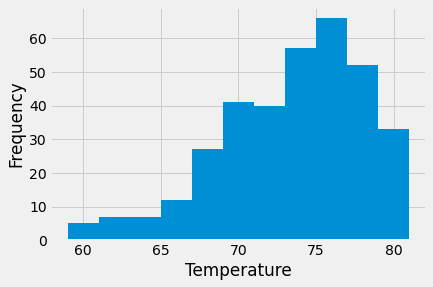

In [34]:
# Plot on historgram

# Putting into DF to find max and min
active_df = pd.DataFrame(active_station_data)
# active_df['tobs'].max() ------ MAX: 83
# active_df['tobs'].min() ------ MIN: 59

bins = [59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81]
plt.hist(active_df['tobs'], bins=bins)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

# Close session

In [17]:
# Close Session
# session.close()